# Keras API Project Exercise

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

## Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

## Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

### Imports 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

### Importing Data

In [2]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [3]:
# function to output column descriptions
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [4]:
df = pd.read_csv('lending_club_loan_two.csv')

In [5]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


## Section 1: Exploratory Data Analysis

* How balanced is our label?
* Average distribution of loan amounts?
* Correlation between continuous variables
* Loan status vs loan amount
* Loan status vs grade
* Correlation of continuous variables to loan status

Text(0.5, 1.0, 'Count of Loan Status')

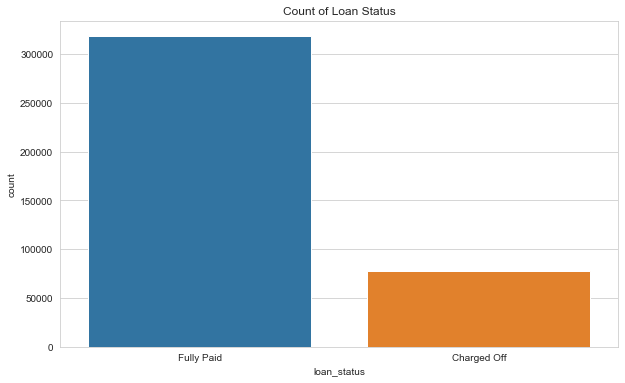

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='loan_status',data=df)
plt.title('Count of Loan Status')

^ Much more skewed towards fully paid, which is expected

Text(0.5, 1.0, 'Distribution of Loan Amounts')

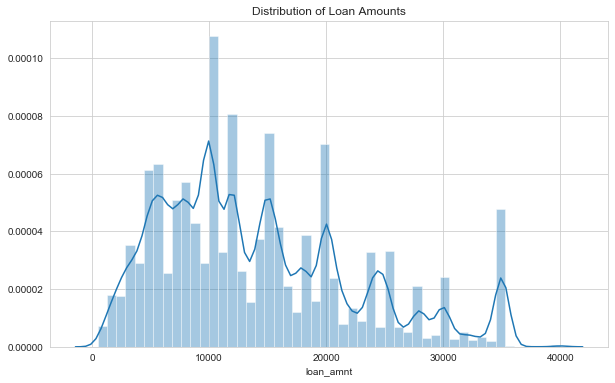

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(df['loan_amnt'])
plt.title('Distribution of Loan Amounts')

^ Right skewed. Large number of outliers at 35k. Spikes every 5k

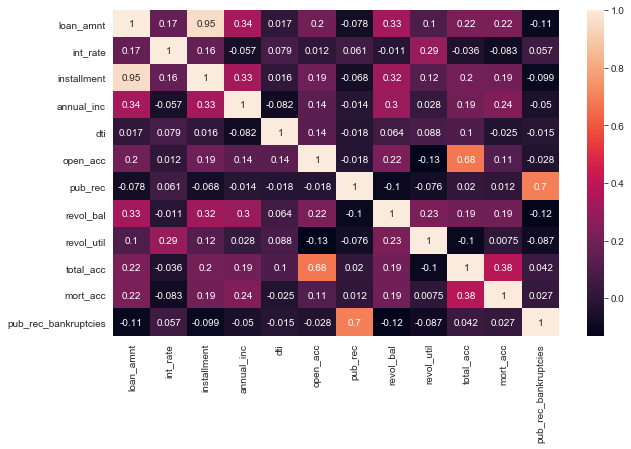

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

^ Large corrlation between installment and loan_amnt (slightly redundant). Correlation between pub_rec and pub_rec_bankruptcies (slightly redundant)

In [11]:
feat_info('loan_amnt')
print("")
feat_info('installment')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

The monthly payment owed by the borrower if the loan originates.


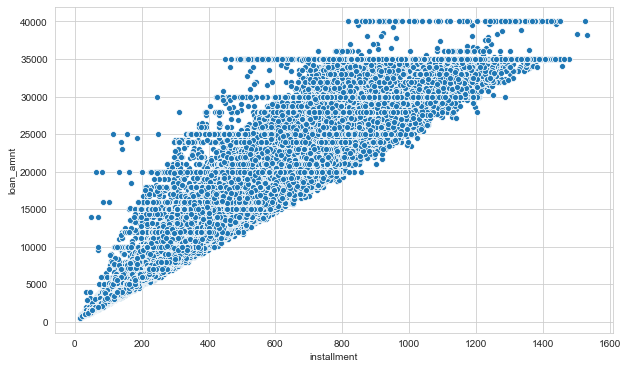

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='installment',y='loan_amnt',data=df)

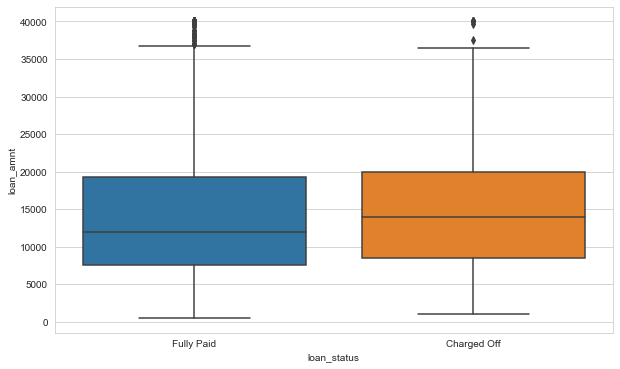

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

^ Slightly higher mean on charged off loans

Looking further into this:

In [14]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Analyzing the different grades

In [15]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [16]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

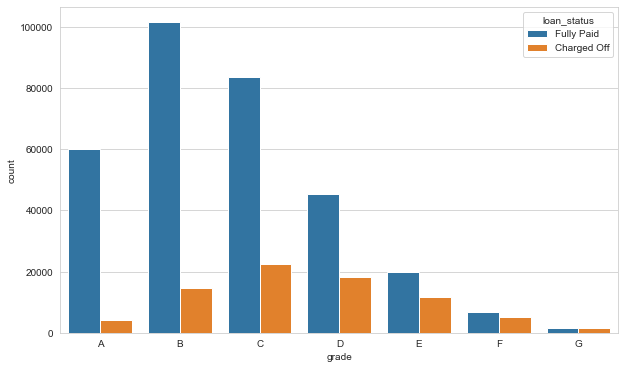

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='grade',data=df,hue='loan_status',order=sorted(df['grade'].unique()))

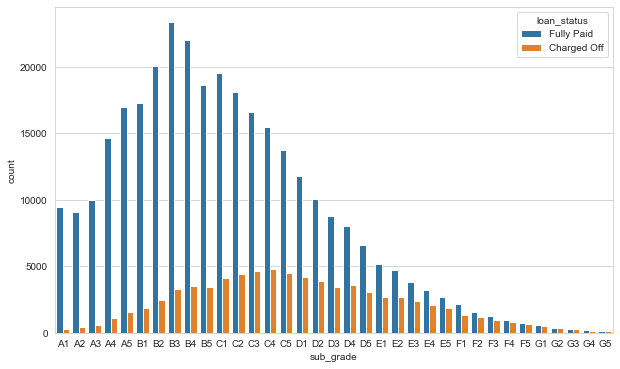

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='sub_grade',data=df,hue='loan_status',order=sorted(df['sub_grade'].unique()))

Looking further into F and G

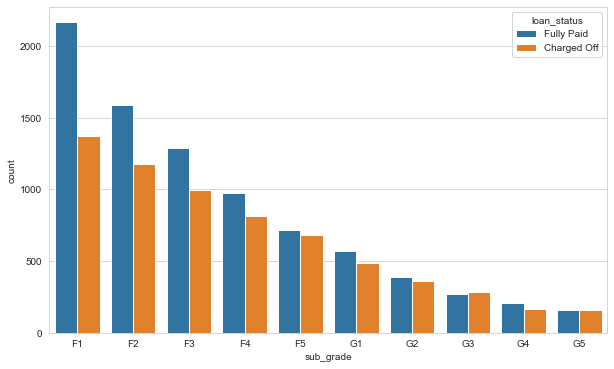

In [19]:
f_and_g_df = df[(df['grade'] == 'F') | (df['grade'] == 'G')]

plt.figure(figsize=(10,6))
sns.countplot(x='sub_grade',data=f_and_g_df,hue='loan_status',order=sorted(f_and_g_df['sub_grade'].unique()))

Creating a new column for paid/not paid

In [20]:
df['paid_off'] = df.apply(lambda row: 1 if row['loan_status']=='Fully Paid' else 0, axis=1)

#another way to accomplish this:
#df['paid_off'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [21]:
df[['paid_off','loan_status']].head()

,paid_off,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


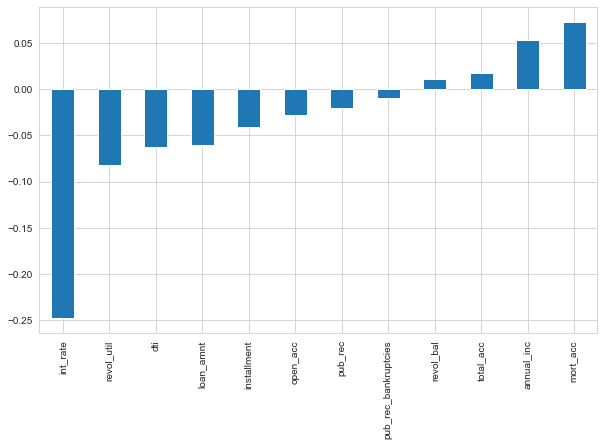

In [22]:
plt.figure(figsize=(10,6))
df.corr()['paid_off'].sort_values().drop('paid_off').plot(kind='bar')

## Section 2: Data PreProcessing

* Convert categorical to dummy variables
* Deal with missing values


### Missing values:

In [27]:
len(df)

396030

In [26]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
paid_off                    0
dtype: int64

In [30]:
df.isna().sum() / len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
paid_off                0.000000
dtype: float64

#### Examine emp_title

In [37]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [38]:
df['emp_title'].nunique()

173105

Too many unique jobs -> drop job title

In [80]:
df.drop('emp_title',axis=1,inplace=True)

#### Examine emp_length

In [39]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [35]:
df['emp_length'].nunique()

11

In [43]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

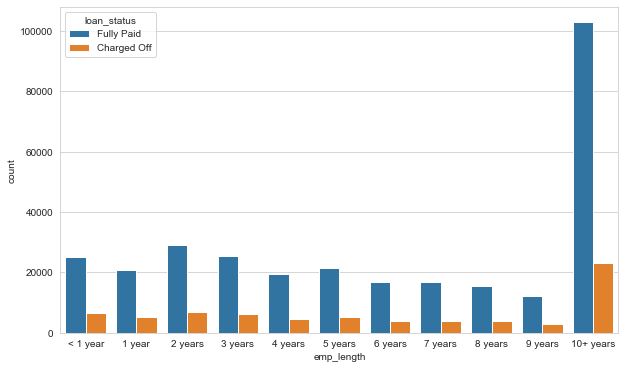

In [50]:
emp_length_order = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
'10+ years']

plt.figure(figsize=(10,6))
sns.countplot(x='emp_length',data=df,hue='loan_status',order=emp_length_order)

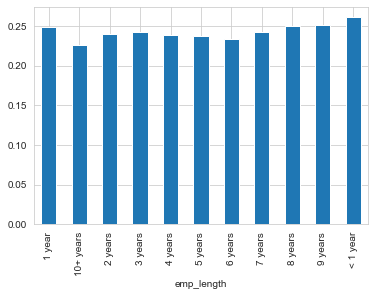

In [72]:
pct_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
pct_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
pct = pct_co / pct_fp
pct.plot(kind='bar')

Emp_length does not appear to heavily affect the pct of loans fully paid -> drop emp_length

In [81]:
df.drop('emp_length',axis=1,inplace=True)

#### Examine title

In [83]:
feat_info('title')

The loan title provided by the borrower


In [85]:
df['title'].nunique()

48817

Too many unique jobs -> drop job title

In [86]:
df.drop('title',axis=1,inplace=True)

#### Examine mort_acc

In [87]:
feat_info('mort_acc')

Number of mortgage accounts.


In [88]:
df['mort_acc'].nunique()

33

In [89]:
df['mort_acc'].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [90]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

Fill in mort_acc values from highest corr variable

In [96]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
paid_off                0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [119]:
total_acc_average = df.groupby('total_acc').mean()['mort_acc']
total_acc_average

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [124]:
df['mort_acc'] = df.apply(lambda row: total_acc_average[row['total_acc']] if np.isnan(row['mort_acc'])==True else row['mort_acc'],axis=1)

#### Examine revol_util and pub_rec_bankruptcies

Account for less than 0.5% -> drop rows with null values

In [128]:
df.drop(['revol_util','pub_rec_bankruptcies'],axis=1,inplace=True)

In [129]:
df.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
address                0
paid_off               0
dtype: int64

### Convert categorical to dummy variables

In [134]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

#### Examine term

In [136]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [139]:
df['term'] = df.apply(lambda row: int(row['term'][:3]),axis=1)

In [140]:
df['term'].unique()

array([36, 60])

#### Examine grade

Remove grade and keep subgrade

In [142]:
df.drop('grade',axis=1,inplace=True)

#### Examine sub_grade

In [144]:
sub_grade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [161]:
df = pd.concat([df,sub_grade_dummies],axis=1)

In [ ]:
df.drop('sub_grade',axis=1,inplace=True)

In [164]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'address', 'paid_off', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2',
       'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4',
       'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'],
      dtype='object')

#### Examine home_ownership

In [178]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [187]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [188]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [189]:
home_ownership_dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

In [190]:
df = pd.concat([df,home_ownership_dummies],axis=1)

In [191]:
df.drop('home_ownership',axis=1,inplace=True)

#### Examine verification_status

In [192]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [193]:
verification_status_dummies = pd.get_dummies(df['verification_status'],drop_first=True)
df = pd.concat([df,home_ownership_dummies],axis=1)
df.drop('verification_status',axis=1,inplace=True)

#### Examine issue_d

Drop issued for data leakage

In [196]:
df.drop('issue_d',axis=1,inplace=True)

#### Examine purpose

In [198]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [200]:
purpose_dummies = pd.get_dummies(df['purpose'],drop_first=True)
df = pd.concat([df,purpose_dummies],axis=1)
df.drop('purpose',axis=1,inplace=True)

#### Examine earliest_cr_line

In [202]:
df['earliest_cr_line'].unique()

array(['Jun-1990', 'Jul-2004', 'Aug-2007', 'Sep-2006', 'Mar-1999',
       'Jan-2005', 'Aug-2005', 'Sep-1994', 'Jun-1994', 'Dec-1997',
       'Dec-1990', 'May-1984', 'Apr-1995', 'Jan-1997', 'May-2001',
       'Mar-1982', 'Sep-1996', 'Jan-1990', 'Mar-2000', 'Jan-2006',
       'Oct-2006', 'Jan-2003', 'May-2008', 'Oct-2003', 'Jun-2004',
       'Jan-1999', 'Apr-1994', 'Apr-1998', 'Jul-2007', 'Apr-2002',
       'Oct-2007', 'Jun-2009', 'May-1997', 'Jul-2006', 'Sep-2003',
       'Aug-1992', 'Dec-1988', 'Feb-2002', 'Jan-1992', 'Aug-2001',
       'Dec-2010', 'Oct-1999', 'Sep-2004', 'Aug-1994', 'Jul-2003',
       'Apr-2000', 'Dec-2004', 'Jun-1995', 'Dec-2003', 'Jul-1994',
       'Oct-1990', 'Dec-2001', 'Apr-1999', 'Feb-1995', 'May-2003',
       'Oct-2002', 'Mar-2004', 'Aug-2003', 'Oct-2000', 'Nov-2004',
       'Mar-2010', 'Mar-1996', 'May-1994', 'Jun-1996', 'Nov-1986',
       'Jan-2001', 'Jan-2002', 'Mar-2001', 'Sep-2012', 'Apr-2006',
       'May-1998', 'Dec-2002', 'Nov-2003', 'Oct-2005', 'May-19

In [ ]:
df['earliest_cr_year'] = df.apply(lambda x: (x['earliest_cr_line'][4:]),axis=1)

In [215]:
df['earliest_cr_year'] = df.apply(lambda x: int(x['earliest_cr_year']),axis=1)

In [209]:
df.drop('earliest_cr_line',axis=1,inplace=True)

#### Examine initial_list_status

In [210]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [211]:
initial_list_status_dummies = pd.get_dummies(df['initial_list_status'],drop_first=True)
df = pd.concat([df,initial_list_status_dummies],axis=1)
df.drop('initial_list_status',axis=1,inplace=True)

#### Examine application_type

In [212]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [216]:
application_type_dummies = pd.get_dummies(df['application_type'],drop_first=True)
df = pd.concat([df,application_type_dummies],axis=1)
df.drop('application_type',axis=1,inplace=True)

#### Examine address

In [220]:
df['address'].unique()

array(['0174 Michelle Gateway\nMendozaberg, OK 22690',
       '1076 Carney Fort Apt. 347\nLoganmouth, SD 05113',
       '87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113', ...,
       '953 Matthew Points Suite 414\nReedfort, NY 70466',
       '7843 Blake Freeway Apt. 229\nNew Michael, FL 29597',
       '787 Michelle Causeway\nBriannaton, AR 48052'], dtype=object)

In [226]:
df['zip_code'] = df.apply(lambda x: int(x['address'][-5:]),axis=1)

In [227]:
df.drop('address',axis=1,inplace=True)

#### Double check for objects and null

In [235]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [242]:
df.drop('loan_status',axis=1,inplace=True)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Columns: 118 entries, loan_amnt to zip_code
dtypes: float64(10), int64(4), object(1), uint8(103)
memory usage: 84.2+ MB


## Section 3: Train Test Split

In [244]:
from sklearn.model_selection import train_test_split

In [247]:
df_limited = df.sample(frac=0.1,random_state=101)

In [248]:
X = df_limited.drop('paid_off',axis=1).values
y= df_limited['paid_off'].values

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Section 4: Normalizing Data

In [252]:
from sklearn.preprocessing import MinMaxScaler

In [253]:
scaler = MinMaxScaler()

In [254]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Section 5: Create Model

In [255]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [256]:
X_train.shape

(31682, 116)

In [257]:
model = Sequential()

# input layer
model.add(Dense(116,activation='relu'))
model.add(Dropout(0.2))

# hidden layer 1
model.add(Dense(58,activation='relu'))
model.add(Dropout(0.2))

#Binary classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [258]:
model.fit(x=X_train,y=y_train,epochs=25,validation_data=(X_test,y_test))

Train on 31682 samples, validate on 7921 samples
Epoch 1/25
31682/31682 [==============================] - 6s 205us/sample - loss: 0.4335 - val_loss: 0.4142
Epoch 2/25
31682/31682 [==============================] - 5s 157us/sample - loss: 0.4048 - val_loss: 0.3974
Epoch 3/25
31682/31682 [==============================] - 5s 149us/sample - loss: 0.3864 - val_loss: 0.3810
Epoch 4/25
31682/31682 [==============================] - 5s 155us/sample - loss: 0.3750 - val_loss: 0.3771
Epoch 5/25
31682/31682 [==============================] - 5s 160us/sample - loss: 0.3682 - val_loss: 0.3771
Epoch 6/25
31682/31682 [==============================] - 5s 149us/sample - loss: 0.3655 - val_loss: 0.3703
Epoch 7/25
31682/31682 [==============================] - 5s 150us/sample - loss: 0.3618 - val_loss: 0.3722
Epoch 8/25
31682/31682 [==============================] - 5s 152us/sample - loss: 0.3612 - val_loss: 0.3703
Epoch 9/25
31682/31682 [==============================] - 5s 150us/sample - loss: 0.359

In [270]:
from tensorflow.keras.models import load_model

In [271]:
model.save('full_data_project_model.h5')  

## Section 6: Model Evaluation

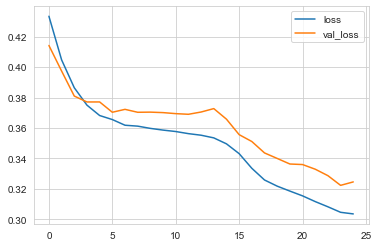

In [259]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [260]:
from sklearn.metrics import classification_report, confusion_matrix

In [262]:
predictions = model.predict_classes(X_test)

In [263]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.37      0.52      1586
           1       0.86      0.99      0.92      6335

    accuracy                           0.87      7921
   macro avg       0.90      0.68      0.72      7921
weighted avg       0.88      0.87      0.84      7921

[[ 580 1006]
 [  45 6290]]


Testing Out on Customer

In [265]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('paid_off',axis=1).iloc[random_ind]
new_customer

loan_amnt           24000.00
term                   60.00
int_rate               13.11
installment           547.43
annual_inc          85000.00
                      ...   
earliest_cr_year     1991.00
w                       0.00
INDIVIDUAL              1.00
JOINT                   0.00
zip_code             5113.00
Name: 304691, Length: 116, dtype: float64

In [267]:
model.predict_classes(new_customer.values.reshape(1,116))

array([[1]], dtype=int32)

In [269]:
df.iloc[random_ind]['paid_off']

1.0